In [1]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
###############################################################################
################ COMPARE DISTRIBUTION OF 10-MIN AND 3-SEC ALPHA  ##############
###############################################################################

#%% Import modules
import os
import numpy as np   
import matplotlib.pyplot as mpyplot
import matplotlib.dates as mdates 
import matplotlib.colors as mcolors 
import matplotlib.style as mstyle
import pandas as pandas
import cmocean
import datetime
import scipy as scipy
from scipy import stats,signal
import pandas
import xarray as xr              


print("done importing modules")


done importing modules


In [2]:
#%% Define file locations
WRF_DIRECTORY_26 = "/projects/storm/mgomez/idealSims/sst_26_skipd01_skipCoLES_ndg/Results/"
WRF_DIRECTORY_27 = "/projects/storm/mgomez/idealSims/sst_27real_skipd01_skipCoLES_ndg/Results/"
WRF_DIRECTORY_30 = "/projects/storm/mgomez/idealSims/sst_28_skipd01_skipCoLES_ndg/Results/"
WRF_DIRECTORY_28 = "/projects/storm/mgomez/idealSims/sst_30_skipd01_skipCoLES_ndg/Results/"
WRF_DIRECTORY_32 = "/projects/storm/mgomez/idealSims/sst_32_skipd01_skipCoLES_ndg/Results/"

fileName = 'alpha_distr.txt'

dirFig = "/projects/storm/mgomez/idealSims/Figures/"


In [3]:
#%% Extract pdf for yaw misalignment
file_26 = np.loadtxt(WRF_DIRECTORY_26+fileName,delimiter=',')
binnss_26 = file_26[:,0]
hist_26 = file_26[:,1:] # [3-sec, 10-min]

file_27 = np.loadtxt(WRF_DIRECTORY_27+fileName,delimiter=',')
binnss_27 = file_27[:,0]
hist_27 = file_27[:,1:] # [3-sec, 10-min]

file_28 = np.loadtxt(WRF_DIRECTORY_28+fileName,delimiter=',')
binnss_28 = file_28[:,0]
hist_28 = file_28[:,1:] # [3-sec, 10-min]

file_30 = np.loadtxt(WRF_DIRECTORY_30+fileName,delimiter=',')
binnss_30 = file_30[:,0]
hist_30 = file_30[:,1:] # [3-sec, 10-min]

file_32 = np.loadtxt(WRF_DIRECTORY_32+fileName,delimiter=',')
binnss_32 = file_32[:,0]
hist_32 = file_32[:,1:] # [3-sec, 10-min]


In [4]:
#%% Colors for each case
col_26 = 'steelblue'
col_27 = 'tab:green'
col_28 = 'goldenrod'
col_30 = 'firebrick'
col_32 = 'tab:purple'
cols = ['steelblue','tab:green','goldenrod','firebrick','tab:purple']

labels = ['26','27','28','30','32']
labels_cat = ['1','2','3','4','5']


In [20]:
#%% Eyewall for each case
# r_eye_26 = 13805
# r_eye_28 = 21300
# r_eye_30 = 20333
# r_eye_32 = 27055
# r_eye_34 = 33638.915

r_eye_26 = 25277.79764175 #23361
r_eye_27 = 19944.46011734 # 19138.9
r_eye_30 = 15833.3457756 # 15138
r_eye_28 = 20611.12730789 # 20333
r_eye_32 = 20388.90491104 # 21000
    

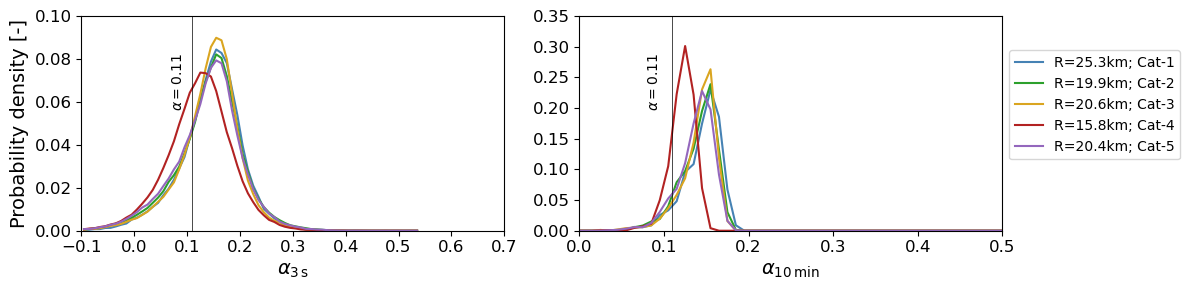

In [23]:
mpyplot.figure(figsize=(12,3))
# 3-sec alpha
mpyplot.subplot(1,2,1)
mpyplot.plot(binnss_26,hist_26[:,0],color=col_26)
mpyplot.plot(binnss_27,hist_27[:,0],color=col_27)
mpyplot.plot(binnss_28,hist_28[:,0],color=col_28)
mpyplot.plot(binnss_30,hist_30[:,0],color=col_30)
mpyplot.plot(binnss_32,hist_32[:,0],color=col_32)
mpyplot.plot([0.11,0.11],[0,1],'-k',linewidth=0.5)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(-0.1,0.7)
mpyplot.ylim(0,0.1)
mpyplot.text(0.07,0.057,s=r"$\alpha=0.11$",rotation=90)
mpyplot.xlabel(r'$\alpha_{3\, \rm s}$',fontsize=14)
mpyplot.ylabel('Probability density [-]',fontsize=14)

# 10-min alpha
mpyplot.subplot(1,2,2)
mpyplot.plot(binnss_26,hist_26[:,1],color=col_26,label='R='+str(np.round(r_eye_26/1000,1))+'km; Cat-1')
mpyplot.plot(binnss_27,hist_27[:,1],color=col_27,label='R='+str(np.round(r_eye_27/1000,1))+'km; Cat-2')
mpyplot.plot(binnss_28,hist_28[:,1],color=col_28,label='R='+str(np.round(r_eye_28/1000,1))+'km; Cat-3')
mpyplot.plot(binnss_30,hist_30[:,1],color=col_30,label='R='+str(np.round(r_eye_30/1000,1))+'km; Cat-4')
mpyplot.plot(binnss_32,hist_32[:,1],color=col_32,label='R='+str(np.round(r_eye_32/1000,1))+'km; Cat-5')
mpyplot.plot([0.11,0.11],[0,1],'-k',linewidth=0.5)
mpyplot.xticks(fontsize=12)
mpyplot.yticks(fontsize=12)
mpyplot.xlim(0,0.5)
mpyplot.ylim(0,0.35)
mpyplot.text(0.08,0.2,s=r"$\alpha=0.11$",rotation=90)
mpyplot.xlabel(r'$\alpha_{10\, \rm min}$',fontsize=14)
mpyplot.legend(loc=3,ncol=1,bbox_to_anchor=[1, 0.3])

mpyplot.tight_layout()

mpyplot.savefig(dirFig + "alpha_pdf.png",facecolor='w',edgecolor='w',dpi=400,bbox_inches='tight')


In [22]:
# Percent of cases that exceed threshold

thres = 0.11 # 15 8

temp_26 = np.nansum(hist_26[binnss_26>thres,:],axis=0)
mean_26 = [np.nansum(hist_26[:,0]*binnss_26),np.nansum(hist_26[:,1]*binnss_26)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_26))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_26))
print('---')

temp_27 = np.nansum(hist_27[binnss_27>thres,:],axis=0)
mean_27 = [np.nansum(hist_27[:,0]*binnss_27),np.nansum(hist_27[:,1]*binnss_27)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_27))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_27))
print('---')

temp_28 = np.nansum(hist_28[binnss_28>thres,:],axis=0)
mean_28 = [np.nansum(hist_28[:,0]*binnss_28),np.nansum(hist_28[:,1]*binnss_28)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_28))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_28))
print('---')


temp_30 = np.nansum(hist_30[binnss_30>thres,:],axis=0)
mean_30 = [np.nansum(hist_30[:,0]*binnss_30),np.nansum(hist_30[:,1]*binnss_30)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_30))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_30))
print('---')

temp_32 = np.nansum(hist_32[binnss_32>thres,:],axis=0)
mean_32 = [np.nansum(hist_32[:,0]*binnss_32),np.nansum(hist_32[:,1]*binnss_32)]
print('Percent of cases above threshold for 3-sec and 10-min profiles is ' + str(100*temp_32))
print('Mean alpha for 3-sec and 10-min profiles is ' + str(mean_32))
print('---')




Percent of cases above threshold for 3-sec and 10-min profiles is [76.86913874 91.86269068]
Mean alpha for 3-sec and 10-min profiles is [0.14534465912465383, 0.1447276398644897]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [74.2487645  90.82702388]
Mean alpha for 3-sec and 10-min profiles is [0.1419585516676185, 0.14049672238813354]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [76.61832703 91.61269566]
Mean alpha for 3-sec and 10-min profiles is [0.1424117276166455, 0.14104582523185372]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [61.15883627 81.91175358]
Mean alpha for 3-sec and 10-min profiles is [0.12307273708259205, 0.12157761295693623]
---
Percent of cases above threshold for 3-sec and 10-min profiles is [71.8237895  88.69263015]
Mean alpha for 3-sec and 10-min profiles is [0.13860127078335044, 0.13751077830723835]
---


In [17]:
# 95th percentile of distributions

# Function that finds bin for ith percentile
def fun_perc(binss,pdf,ith):
    summ =  0
    bin_perc = binss[0]
    return_this = [0,0]
    for i in np.flip(np.arange(len(pdf))):
        if summ<ith/2:
            summ += pdf[i]
            return_this[0] = binss[i]
    summ = 0.0
    for i in np.arange(len(pdf)):
        if summ<ith/2:
            summ += pdf[i]
            return_this[1] = binss[i]       
    return return_this
            


In [18]:
# Find mean bin for i-th percentile
iith = 1-0.95

print('26C')
print(fun_perc(binnss_26,hist_26[:,0],iith))
print(fun_perc(binnss_26,hist_26[:,1],iith))
print('----')

print('27C')
print(fun_perc(binnss_27,hist_27[:,0],iith))
print(fun_perc(binnss_27,hist_27[:,1],iith))
print('----')

print('28C')
print(fun_perc(binnss_28,hist_28[:,0],iith))
print(fun_perc(binnss_28,hist_28[:,1],iith))
print('----')

print('30C')
print(fun_perc(binnss_30,hist_30[:,0],iith))
print(fun_perc(binnss_30,hist_30[:,1],iith))
print('----')

print('32C')
print(fun_perc(binnss_32,hist_32[:,0],iith))
print(fun_perc(binnss_32,hist_32[:,1],iith))
print('----')




26C
[0.2549999999999998, 0.014999999999999937]
[0.17499999999999985, 0.09499999999999989]
----
27C
[0.2549999999999998, -0.005000000000000053]
[0.17499999999999985, 0.0849999999999999]
----
28C
[0.24499999999999983, 0.004999999999999942]
[0.16499999999999987, 0.0849999999999999]
----
30C
[0.24499999999999983, -0.005000000000000053]
[0.14499999999999988, 0.0849999999999999]
----
32C
[0.2549999999999998, -0.005000000000000053]
[0.16499999999999987, 0.0849999999999999]
----
